In [2]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import matplotlib.patches as patches

# Задание 2

### bounding_box(img) -- возвращает описывающий прямоугольник вокруг ненулевых пикселов
Возвращает кортеж из четырёх переменных (rmin, rmax, cmin, cmax)
- rmin индекс наименьшей строки (координата y)
- rmax индекс наибольшей строки (координата y)
- cmin индекс наименьшего столбца (координата x)
- cmax индекс наибольшего столбца (координата x)

## TODO1: реализовать функцию bounding_box

In [3]:
def bounding_box(img):
    rmin, rmax = 0,0
    cmin, cmax = 0,0        

    rmin, cmax = np.where(img == 1)
    print(cmax)
    cmin = np.min(cmax)
    cmax = np.max(cmax)
    rmax=np.max(rmin)
    rmin=np.min(rmin)

    return rmin, rmax, cmin, cmax

### get_bin_mask(mask, color) -- возвращает бинарную маску для заданного цвета

## TODO2: реализовать функцию get_bin_mask

In [6]:
def get_bin_mask(mask, color):
    bin_mask = np.zeros_like(mask[:, :, 0])

    bin_mask = np.where((np.all(mask == color, axis=2)),1,0)

    return bin_mask

# Загружаем изображение и маску

In [5]:
img = Image.open('image.png')
mask = Image.open('mask.png')
img = np.array(img)
mask = np.array(mask)


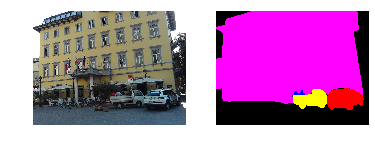

In [7]:
f, axarr = plt.subplots(1,2)
axarr[0].axis('off')
axarr[0].imshow(img)
axarr[1].axis('off')
axarr[1].imshow(mask)
plt.show()

### Получаем бинарную маску грузовика

In [8]:
bin_mask = get_bin_mask(mask, [255,255,0])

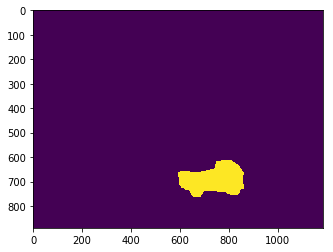

In [9]:
plt.figure()
plt.imshow(bin_mask)
plt.show()

### Находим описывающий прямоугольник

In [10]:
bbox = bounding_box(bin_mask)

[787 788 789 ... 681 682 683]


In [100]:
bbox

(612, 762, 593, 862)

In [11]:
width = bbox[3] - bbox[2]
height = bbox[1] - bbox[0]

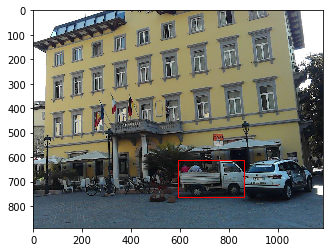

In [12]:
fig,ax = plt.subplots(1)
ax.imshow(img)
rect = patches.Rectangle((bbox[2],bbox[0]),width,height,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.show()

In [103]:
result_img = Image.open('result.png')
plt.figure()
plt.axis('off')
plt.imshow(result_img)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'result.png'